## Instacart Market Basket Analysis: EDA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
 aisles= pd.read_csv(r'\Users\Atharva\Desktop\Python files\PDS python notebook\Project\Dataset\aisles.csv')
 departments=pd.read_csv(r'C:\Users\Atharva\Desktop\Python files\PDS python notebook\Project\Dataset\departments.csv')
 order_products_prior=pd.read_csv(r'C:\Users\Atharva\Desktop\Python files\PDS python notebook\Project\Dataset\order_products__prior.csv')
 order_products_train=pd.read_csv(r'C:\Users\Atharva\Desktop\Python files\PDS python notebook\Project\Dataset\order_products__train.csv')
 orders=pd.read_csv(r'C:\Users\Atharva\Desktop\Python files\PDS python notebook\Project\Dataset\orders.csv')
 products=pd.read_csv(r'C:\Users\Atharva\Desktop\Python files\PDS python notebook\Project\Dataset\products.csv')

In [3]:
#aisles= pd.read_csv("aisles.csv")
#departments=pd.read_csv("departments.csv")
#order_products_prior=pd.read_csv("order_products__prior.csv")
#order_products_train=pd.read_csv("order_products__train.csv")
#orders=pd.read_csv("orders.csv")
#products=pd.read_csv("products.csv")

In [3]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [5]:
len(aisles)

134

In [6]:
aisles['aisle'].nunique()

134

In [7]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [8]:
len(departments)

21

In [9]:
departments['department'].nunique()

21

In [10]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [11]:
len(order_products_prior)

32434489

In [12]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [13]:
len(order_products_train)

1384617

In [14]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [15]:
len(orders)

3421083

In [16]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [17]:
len(products)

49688

In [18]:
products['product_name'].nunique()

49688

## Checking missing data and percentage

In [19]:
#Order
total_o=orders.isnull().sum()
percentage=total_o/orders.isnull().count()
missing_value_table_orders = pd.concat([total_o,percentage],keys=['Total','Percentage'],axis=1)
missing_value_table_orders


,Total,Percentage
order_id,0,0.000000
user_id,0,0.000000
eval_set,0,0.000000
order_number,0,0.000000
order_dow,0,0.000000
order_hour_of_day,0,0.000000
days_since_prior_order,206209,0.060276


In [20]:
orders_new=orders[orders['days_since_prior_order'].notnull()]
orders_new.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0


In [21]:
len(orders_new)

3214874

In [22]:
#Aisles
total_a=aisles.isnull().count()
percentage_a=total_a/aisles.isnull().count()
missing_value_table_aisles = pd.concat([total_a,percentage_a],keys=['Total','Percentage'],axis=1)
missing_value_table_aisles

,Total,Percentage
aisle_id,134,1.0
aisle,134,1.0


In [23]:
#Departments
total_d=departments.isnull().sum()
percentage_d=total_d/departments.isnull().count()
missing_value_table_departments = pd.concat([total_d,percentage_d],keys=['Total','Percentage'],axis=1)
missing_value_table_departments

,Total,Percentage
department_id,0,0.0
department,0,0.0


In [24]:
#Orders_prior
total_order_p_p=order_products_prior.isnull().sum()
percentage_order_p_p=total_order_p_p/order_products_prior.isnull().count()
missing_value_table_order_p_p = pd.concat([total_order_p_p,percentage_order_p_p],keys=['Total','Percentage'],axis=1)
missing_value_table_order_p_p

,Total,Percentage
order_id,0,0.0
product_id,0,0.0
add_to_cart_order,0,0.0
reordered,0,0.0


In [25]:
#Order_train
total_order_train=order_products_train.isnull().sum()
percentage_order_train=total_order_train/order_products_train.isnull().count()
missing_value_table_order_train = pd.concat([total_order_train,percentage_order_train],keys=['Total','Percentage'],axis=1)
missing_value_table_order_train

,Total,Percentage
order_id,0,0.0
product_id,0,0.0
add_to_cart_order,0,0.0
reordered,0,0.0


In [26]:
#Products
total_products=products.isnull().sum()
percentage_products=total_products/products.isnull().count()
missing_value_table_products = pd.concat([total_products,percentage_products],keys=['Total','Percentage'],axis=1)

missing_value_table_products

,Total,Percentage
product_id,0,0.0
product_name,0,0.0
aisle_id,0,0.0
department_id,0,0.0


## Exploratory Data Analysis & Data Visualization

In [27]:
count=orders['eval_set'].value_counts()
count

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

Text(0.5, 1.0, 'Eval_set breakdown in orders dataset')

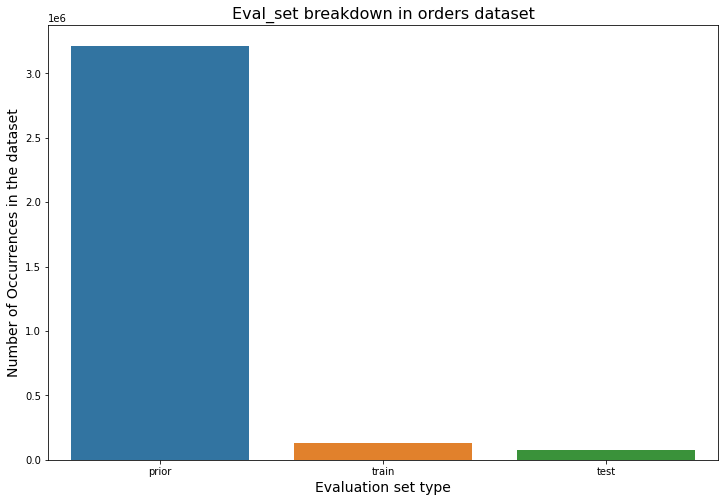

In [28]:
plt.figure(figsize=(12,8))
sns.barplot(count.index, count.values)
plt.ylabel('Number of Occurrences in the dataset', fontsize=14)
plt.xlabel('Evaluation set type', fontsize=14)
plt.title('Eval_set breakdown in orders dataset', fontsize=16)

#### From the above graph we can see that that test evaluation as 75000 samples on which we will obtain predictions. Now let's see the distribution with respect to the hour of the day

In [29]:
count_hour_of_day=orders['order_hour_of_day'].value_counts()
count_hour_of_day

10    288418
11    284728
15    283639
14    283042
13    277999
12    272841
16    272553
9     257812
17    228795
18    182912
8     178201
19    140569
20    104292
7      91868
21     78109
22     61468
23     40043
6      30529
0      22758
1      12398
5       9569
2       7539
4       5527
3       5474
Name: order_hour_of_day, dtype: int64

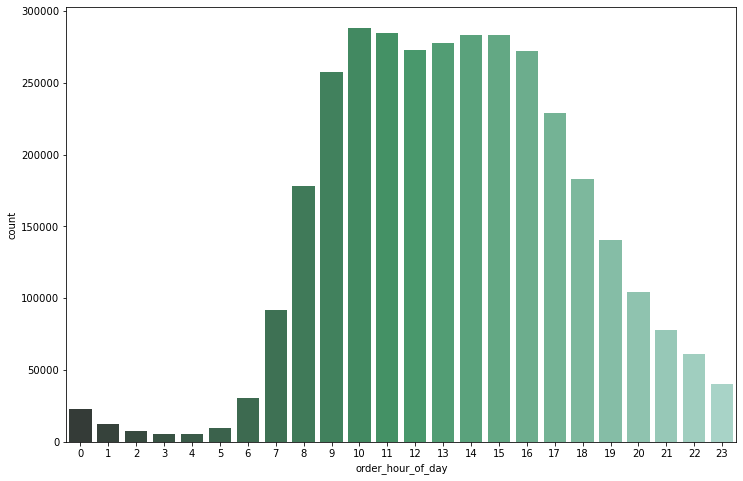

In [30]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="order_hour_of_day", data=orders,palette='BuGn_d')

In [31]:
count_dow=orders['order_dow'].value_counts()
count_dow

0    600905
1    587478
2    467260
5    453368
6    448761
3    436972
4    426339
Name: order_dow, dtype: int64

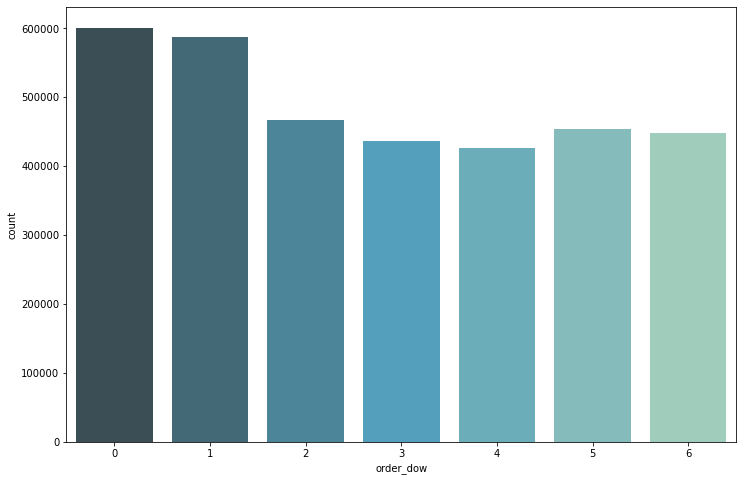

In [32]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="order_dow", data=orders,palette='GnBu_d')

#### From this graph we can see that, the number of orders are higher on Sunday and Monday which makes sense since people want to shop for groceries either at the start of the week or on the weekend. On the other hand, it's the least in the mid week which is Thursday followed by Wednesday. Now to know more, let's look at the orders with respect to the hours on a given day of the week.

#### Sunday

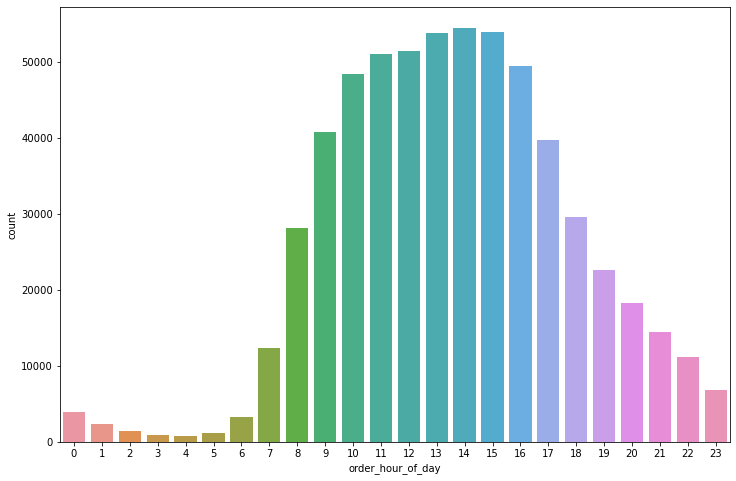

In [33]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='order_hour_of_day',data=orders[orders['order_dow']==0])

#### This is the plot of orders on Sunday. We can see that maximum number of orders are placed around 2-3pm. similarly, let's look at the orders by hour distribution for the rest of the days to get an idea about weekend vs weekdays patterns.

#### Monday

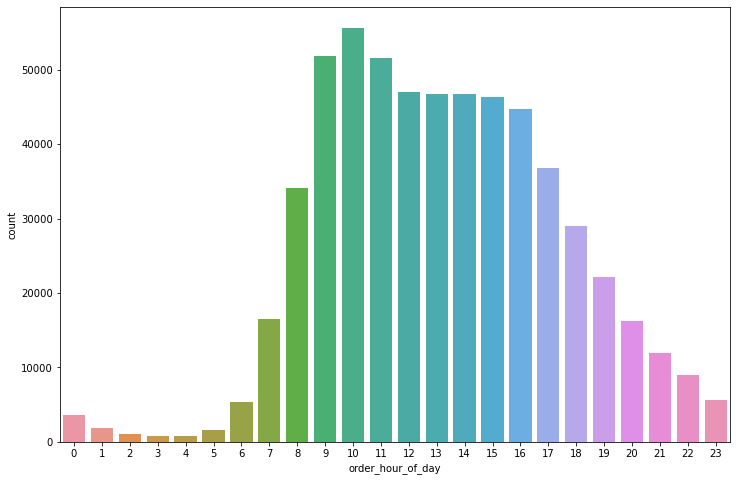

In [34]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='order_hour_of_day',data=orders[orders['order_dow']==1])

#### So on monday, the peak is reached at 10AM. So most of the orders are placed in the morning on Monday from 9-11AM. Followed by 12-3pm.

#### Tuesday

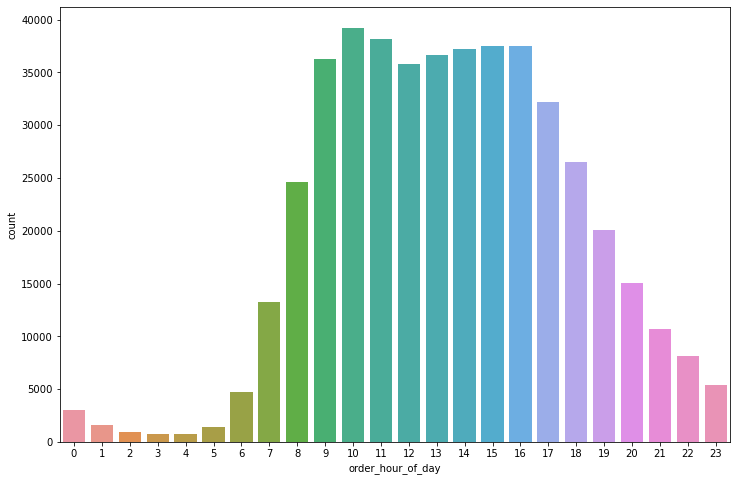

In [35]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='order_hour_of_day',data=orders[orders['order_dow']==2])

#### Tuesday also pretty much follows the same trend as Monday. Having most orders in the morning from 10-11AM

#### Wednesday

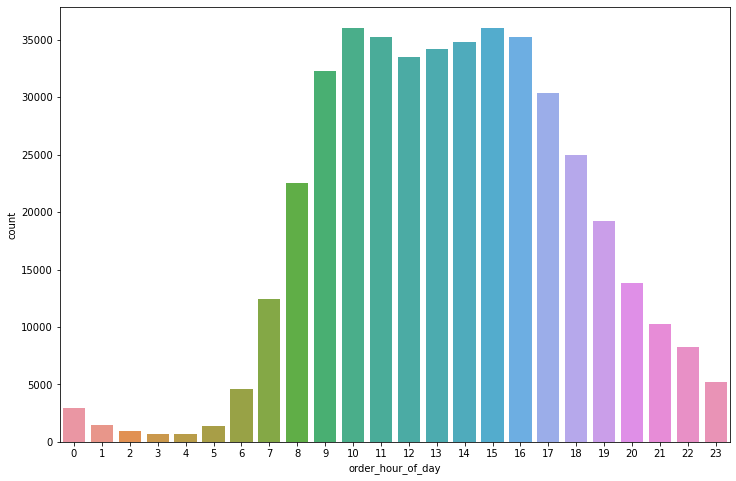

In [36]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='order_hour_of_day',data=orders[orders['order_dow']==3])

#### Thursday

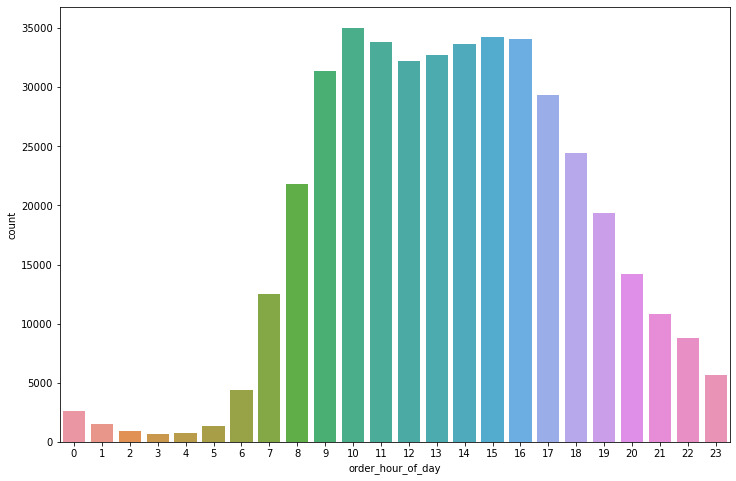

In [37]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='order_hour_of_day',data=orders[orders['order_dow']==4])

#### Friday

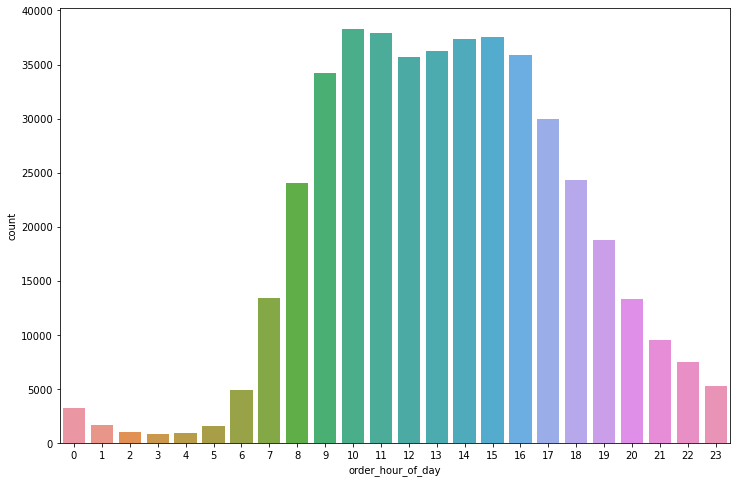

In [38]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='order_hour_of_day',data=orders[orders['order_dow']==5])

#### Saturday

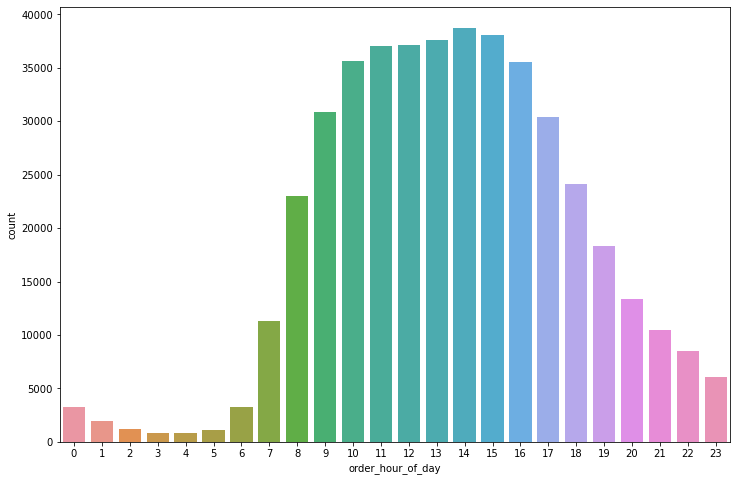

In [39]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='order_hour_of_day',data=orders[orders['order_dow']==6])

#### The graphs for Wednesday,Thursday and Friday pretty much follow the trend for Monday and Tuesday. But in the above graph for Saturday, the peak times is in the afternoon around 2-3pm. So we can see that, during the weekends, peak orders are in the afternoon from 2-4pm whereas in the weekdays, it's in the morning from 10AM-12PM. 

#### Now, let's get the orders in terms of hour of the day and day of the week in a single dataset by using the groupby option for better visualization.

In [40]:
grouped_orders = orders_new.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_orders

,order_dow,order_hour_of_day,order_number
0,0,0,3690
1,0,1,2245
2,0,2,1296
3,0,3,902
4,0,4,756
...,...,...,...
163,6,19,17128
164,6,20,12486
165,6,21,9842
166,6,22,7973


#### Pivoting the table for clarity

In [41]:
grouped_orders = grouped_orders.pivot('order_dow', 'order_hour_of_day', 'order_number')
grouped_orders

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,3690,2245,1296,902,756,1093,3143,11762,26514,38363,...,51038,50427,46136,37056,27588,21126,17062,13577,10543,6460
1,3429,1723,1020,696,756,1523,5078,15725,32382,49136,...,43986,43590,41930,34407,27046,20687,15223,11196,8417,5245
2,2843,1472,878,683,696,1317,4511,12606,23343,34351,...,34946,35249,35239,30092,24797,18794,14045,10032,7649,4994
3,2760,1398,893,608,676,1279,4345,11775,21338,30578,...,32665,33878,33156,28483,23399,17991,12977,9681,7735,4867
4,2476,1415,841,644,695,1253,4184,11893,20682,29670,...,31696,32244,32034,27697,22935,18140,13326,10198,8275,5305
5,2987,1568,952,780,846,1502,4632,12770,22789,32342,...,35351,35379,33770,28131,22806,17517,12500,8945,7013,4926
6,3080,1815,1130,804,739,1056,3063,10696,21696,29012,...,36325,35608,33194,28342,22562,17128,12486,9842,7973,5710


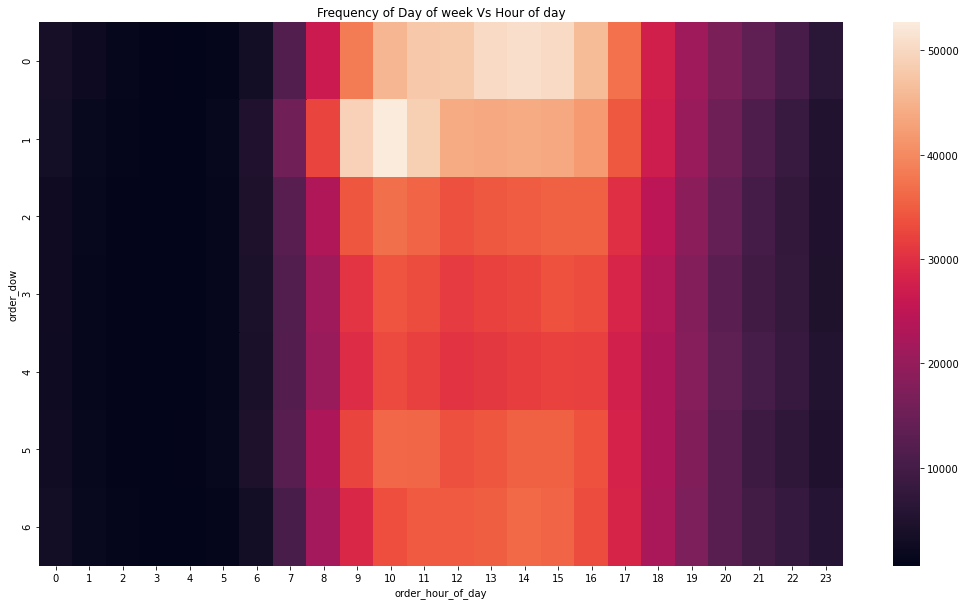

In [42]:
plt.figure(figsize=(18,10))
sns.heatmap(grouped_orders)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

#### From the above heatmap, we can see that peak orders are in the afternoon on Sunday and Monday, from 9AM-4PM.

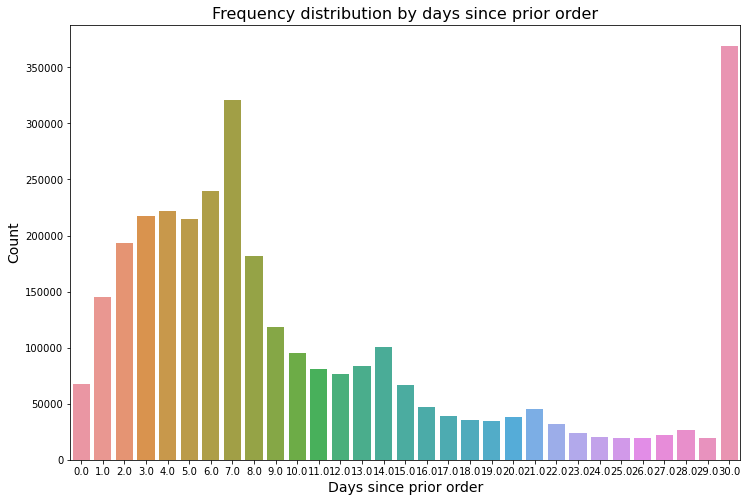

In [43]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders_new)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Days since prior order', fontsize=14)
plt.title("Frequency distribution by days since prior order", fontsize=16)
plt.show()

#### From this plot we can see that 7th day is where we have a spike, and then a relative small peak at days 14,21 and 28 which indicates that the frequency of order is every 7 days. And then again there's a huge peak at the end of the month indicating that there's a monthly peak.

#### Percentage of re-orders in orders_products_prior

In [44]:
order_products_prior.reordered.sum() / len(order_products_prior)

0.5896974667922161

Approximately 59% of the products are re-ordered from the prior dataset

#### Percentage of re-orders in orders_products_train

In [45]:
order_products_train.reordered.sum() / len(order_products_train)

0.5985944127509629

Approximately 60% of the products are re-ordered from the train dataset

#### Merging order_products_prior and products

In [46]:
op_prior_merged = pd.merge(order_products_prior, products, on='product_id', how='left')
op_prior_merged.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,2,28985,2,1,Michigan Organic Kale,83,4
2,2,9327,3,0,Garlic Powder,104,13
3,2,45918,4,1,Coconut Butter,19,13
4,2,30035,5,0,Natural Sweetener,17,13


In [47]:
count_products = op_prior_merged['product_name'].value_counts().reset_index().head(20)
count_products.columns=['product_name','frequency']

In [48]:
count_products

,product_name,frequency
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


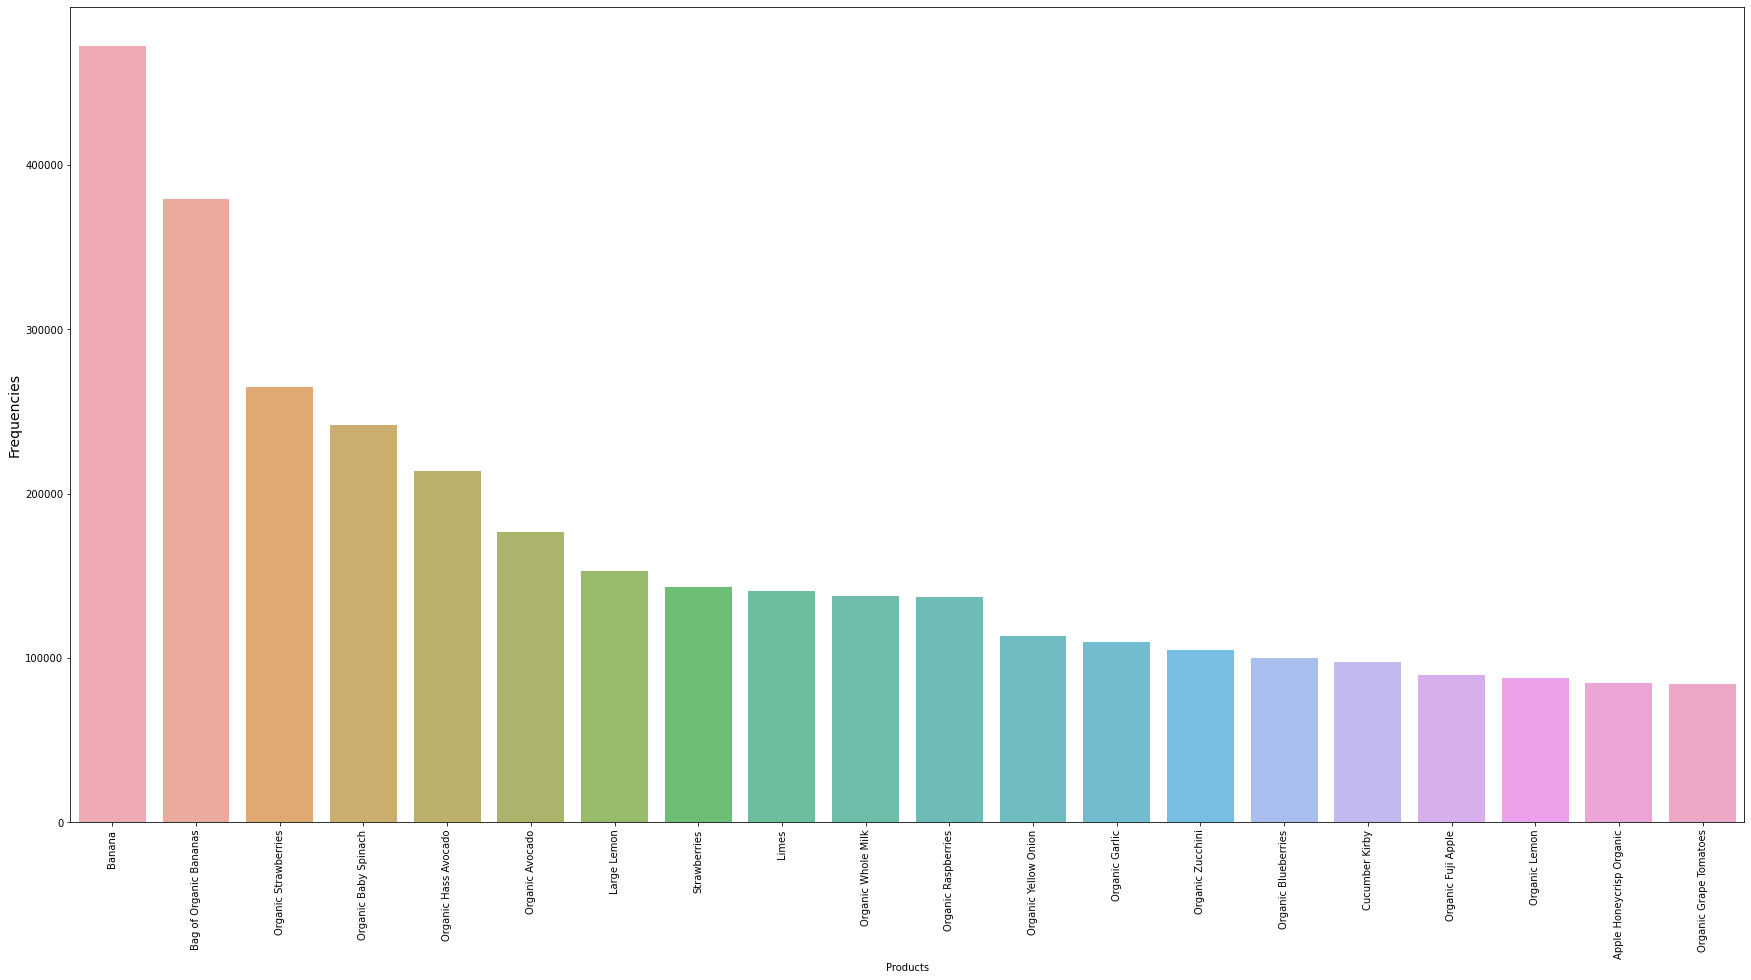

In [49]:
plt.figure(figsize=(30,15))
sns.barplot(count_products.product_name, count_products.frequency, alpha=0.8)
plt.ylabel('Frequencies', fontsize=14)
plt.xlabel('Products', fontsize=10)
plt.xticks(rotation='vertical')
plt.show()

In [50]:
count_aisles = op_prior_merged['aisle_id'].value_counts().head(20)
count_aisles

24     3642188
83     3418021
123    1765313
120    1452343
21      979763
84      891015
115     841533
107     722470
91      638253
112     584834
31      575881
116     522654
37      498425
78      458838
3       456386
86      452134
96      395130
38      390299
92      382456
16      377741
Name: aisle_id, dtype: int64

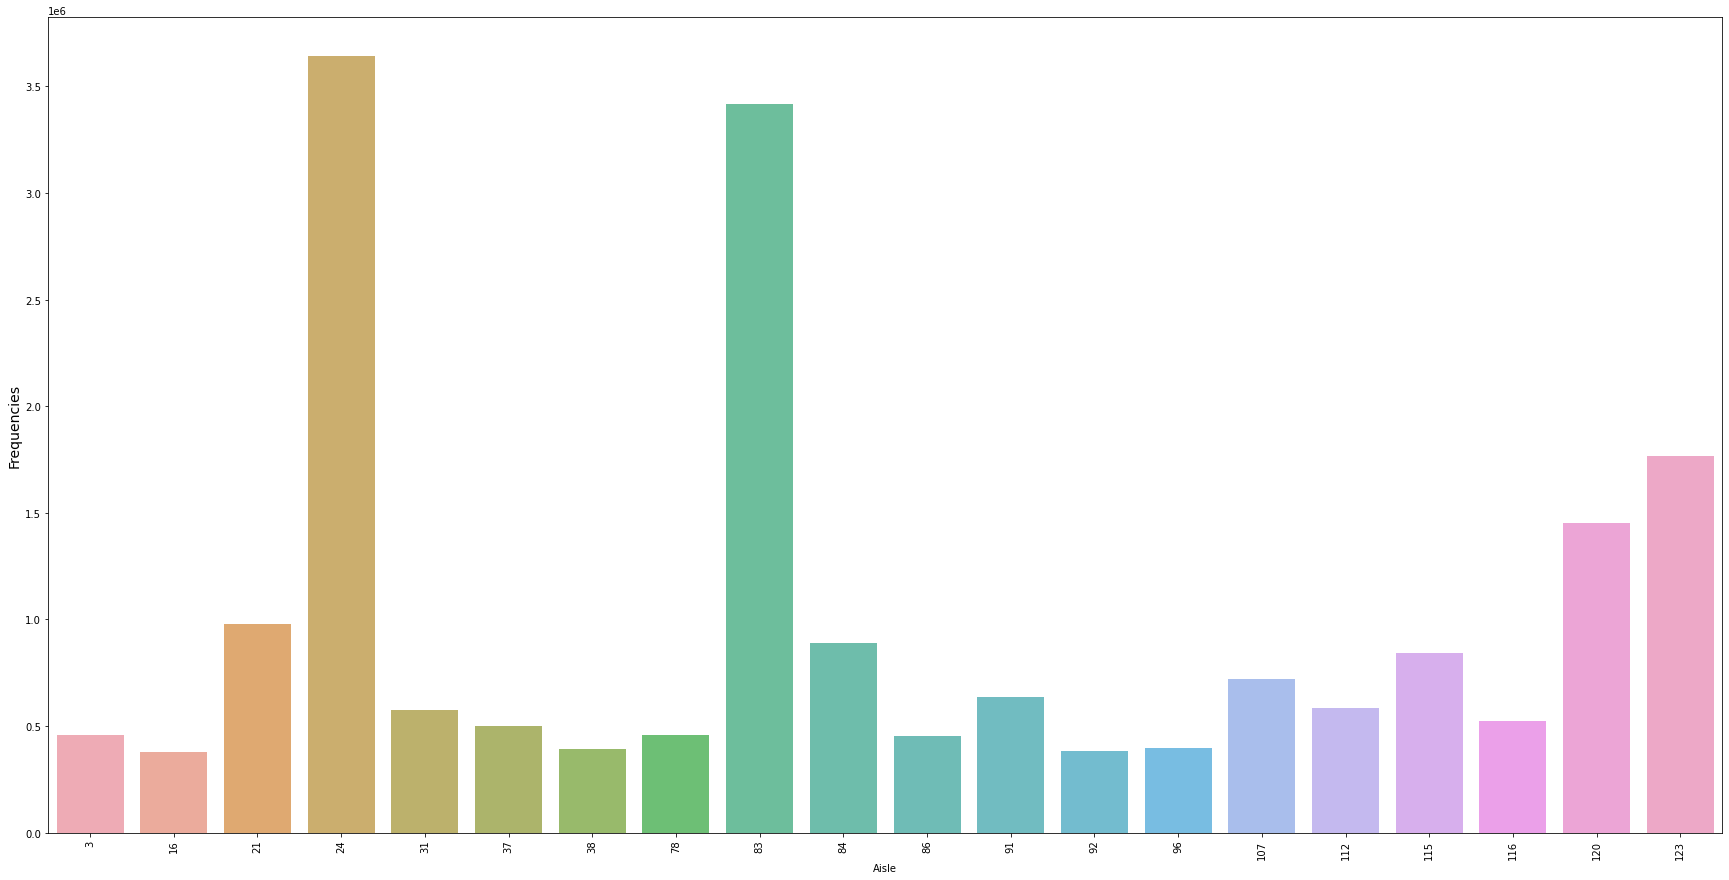

In [51]:
plt.figure(figsize=(30,15))
sns.barplot(count_aisles.index, count_aisles.values, alpha=0.8)
plt.ylabel('Frequencies', fontsize=14)
plt.xlabel('Aisle', fontsize=10)
plt.xticks(rotation='vertical')
plt.show()

#### From this graph we can see that the fresh food and fresh vegetables aisles are the most frequently visited. We can do the same analysis for department and also check the reordered items against day of the week and the hour of the day.

In [52]:
count_dept = op_prior_merged['department_id'].value_counts()
count_dept

4     9479291
16    5414016
19    2887550
7     2690129
1     2236432
13    1875577
3     1176787
15    1068058
20    1051249
9      866627
17     738666
14     709569
12     708931
11     447123
18     423802
6      269253
5      153696
8       97724
21      69145
2       36291
10      34573
Name: department_id, dtype: int64

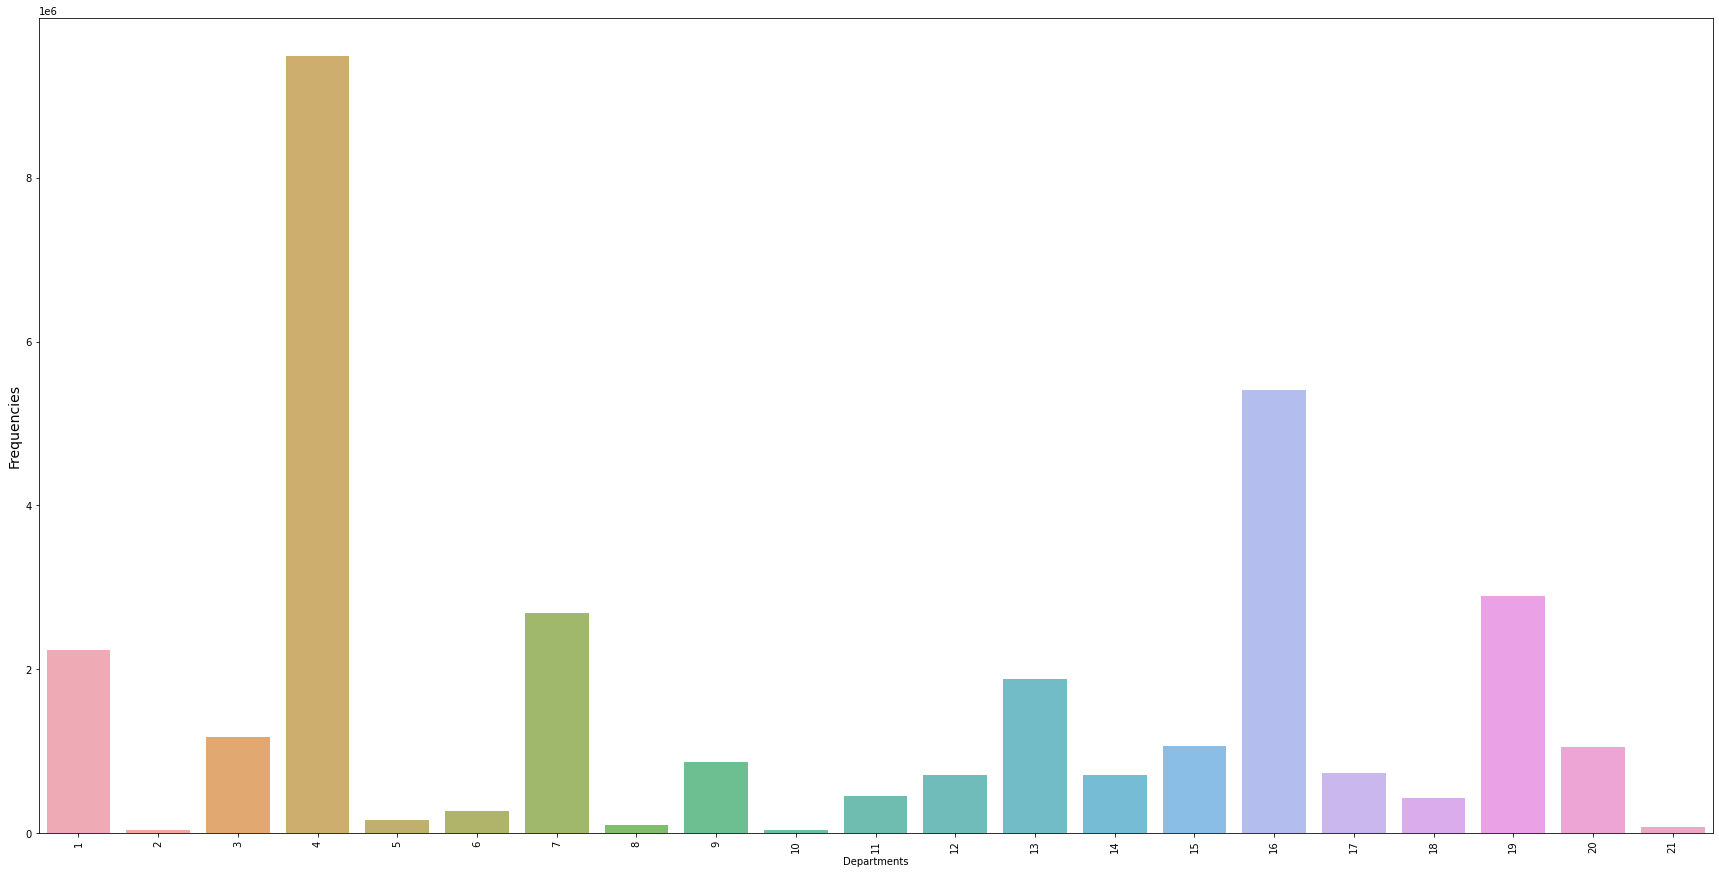

In [53]:
plt.figure(figsize=(30,15))
sns.barplot(count_dept.index, count_dept.values, alpha=0.8)
plt.ylabel('Frequencies', fontsize=14)
plt.xlabel('Departments', fontsize=10)
plt.xticks(rotation='vertical')
plt.show()

#### From the graph we can see that the department wise frequency is more for produce which aligns with the aisles frequency and then for dairy eggs.

#### Merge order_product_prior with orders

In [54]:
merged_reorders = pd.merge(order_products_prior, orders, on='order_id', how='left')
merged_reorders.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,202279,prior,3,5,9,8.0
2,2,9327,3,0,202279,prior,3,5,9,8.0
3,2,45918,4,1,202279,prior,3,5,9,8.0
4,2,30035,5,0,202279,prior,3,5,9,8.0


In [55]:
count_reordered = merged_reorders['reordered'].value_counts()
count_reordered

1    19126536
0    13307953
Name: reordered, dtype: int64

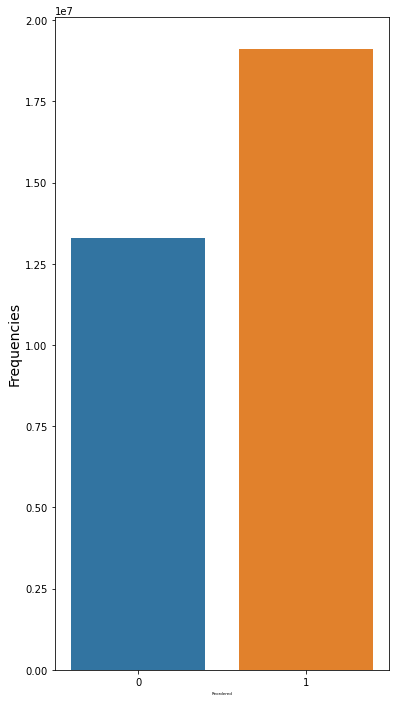

In [56]:
plt.figure(figsize=(6,12))
sns.barplot(count_reordered.index, count_reordered.values)
plt.ylabel('Frequencies', fontsize=14)
plt.xlabel('Reordered', fontsize=4)
plt.show()

#### Finding reorders against day of the week

In [57]:
grouped_reorders_dow = merged_reorders.groupby(["order_dow"])["reordered"].aggregate("count").reset_index()
grouped_reorders_dow

,order_dow,reordered
0,0,6209666
1,1,5665856
2,2,4217798
3,3,3844117
4,4,3787215
5,5,4209533
6,6,4500304


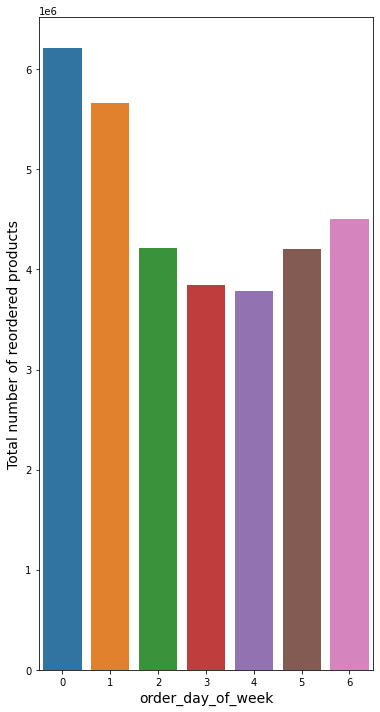

In [58]:
plt.figure(figsize=(6,12))
sns.barplot(grouped_reorders_dow.order_dow, grouped_reorders_dow.reordered)
plt.ylabel('Total number of reordered products', fontsize=14)
plt.xlabel('order_day_of_week', fontsize=14)
plt.show()

#### From this graph, we can see that most products are reordered on Sunday followed by Monday and Saturday. Which follows the same trend as orders placed over the week.

#### Finding reorders against hour of the day

In [59]:
grouped_reorders = merged_reorders.groupby(["order_hour_of_day"])["reordered"].aggregate("count").reset_index()
grouped_reorders

,order_hour_of_day,reordered
0,0,218948
1,1,115786
2,2,69434
3,3,51321
4,4,53283
5,5,88062
6,6,290795
7,7,891937
8,8,1719973
9,9,2456713


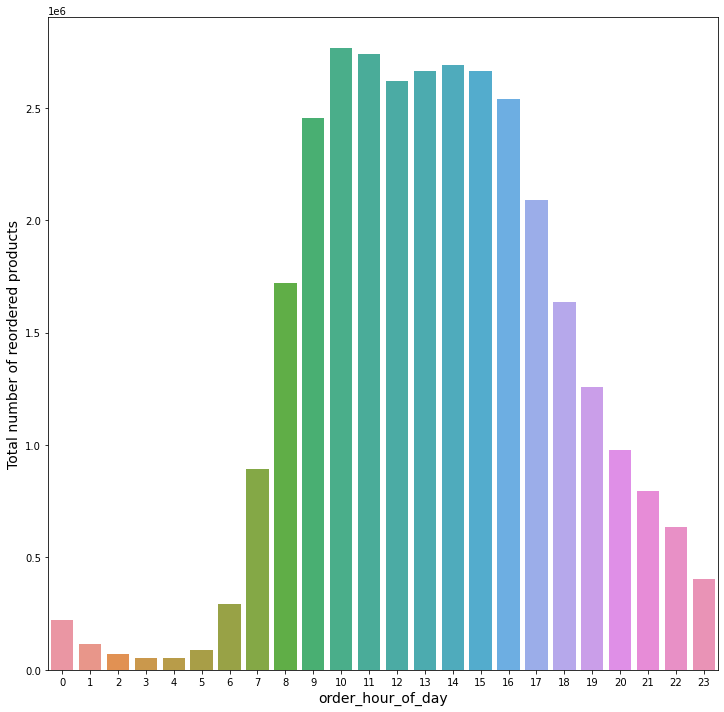

In [60]:
plt.figure(figsize=(12,12))
sns.barplot(grouped_reorders.order_hour_of_day, grouped_reorders.reordered)
plt.ylabel('Total number of reordered products', fontsize=14)
plt.xlabel('order_hour_of_day', fontsize=14)
plt.show()

#### This graph shows that most products are reordered from 10-11AM followed by 1-3pm. This aligns with the number of products ordered during the week and the weekends.

## Research - To predict which previously purchased products will be in a user’s next order

### Pre-processing 

#### Step 1 - We will start with reading the orders file.

In [61]:
orders_df = orders[['order_id','user_id','order_number']]

Since the objective is to predict which previously purchased products will be in next order, let us first get the list of all products purchased by the customer.

#### Step 2 -  Create data frame with old purchase

In [62]:
# Read the prior order file
prior_df = order_products_prior

# Merge with the orders file to get the user_id
prior_df = pd.merge(prior_df, orders_df, how="inner", on="order_id")
prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number
0,2,33120,1,1,202279,3
1,2,28985,2,1,202279,3
2,2,9327,3,0,202279,3
3,2,45918,4,1,202279,3
4,2,30035,5,0,202279,3


#### Step 3 - Create data frame with latest purchase

In [63]:
# Get the products and reorder status of the latest purchase of each user.
prior_grouped_df = prior_df.groupby("user_id")["order_number"].aggregate("max").reset_index()
prior_grouped_df.head()

,user_id,order_number
0,1,10
1,2,14
2,3,12
3,4,5
4,5,4


In [64]:
prior_df_latest = pd.merge(prior_df, prior_grouped_df, how="inner", on=["user_id", "order_number"])
prior_df_latest.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number
0,25,9755,1,1,59897,19
1,25,31487,2,0,59897,19
2,25,37510,3,1,59897,19
3,25,14576,4,1,59897,19
4,25,22105,5,0,59897,19


In [65]:
prior_df_latest = prior_df_latest[["user_id", "product_id", "reordered"]]
prior_df_latest.columns = ["user_id", "product_id", "reordered_latest"]
prior_df_latest.head()

,user_id,product_id,reordered_latest
0,59897,9755,1
1,59897,31487,0
2,59897,37510,1
3,59897,14576,1
4,59897,22105,0


#### Step 4 - Get count of Number of reorders

In [66]:
# Get the count of each product and number of reorders by the customer
prior_df_agg = prior_df.groupby(["user_id","product_id"])["reordered"].aggregate(["count", "sum"]).reset_index()
prior_df_agg.columns = ["user_id", "product_id", "reordered_count", "reordered_sum"]
prior_df_agg.head()

,user_id,product_id,reordered_count,reordered_sum
0,1,196,10,9
1,1,10258,9,8
2,1,10326,1,0
3,1,12427,10,9
4,1,13032,3,2


#### Step 5 - Merge the prior df with latest df

In [67]:
prior_df_merge = pd.merge(prior_df_agg, prior_df_latest, how="left", on=["user_id","product_id"])
prior_df_merge.head()

,user_id,product_id,reordered_count,reordered_sum,reordered_latest
0,1,196,10,9,1.0
1,1,10258,9,8,1.0
2,1,10326,1,0,NaN
3,1,12427,10,9,1.0
4,1,13032,3,2,1.0


#### Step 6 - Read the train and test dataset and then merge with orders data to get the user_id for the corresponding order_id.

In [68]:
orders_df.drop(["order_number"],axis=1,inplace=True)

train_df = order_products_train[['order_id']]
train_df.head()

C:\Users\avina\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,order_id
0,1
1,1
2,1
3,1
4,1


#### Step 7 - Get distinct order id in train_df. This will help in joining the data frame with orders.

In [69]:
train_df = train_df.groupby("order_id").aggregate("count").reset_index()
train_df.head()

,order_id
0,1
1,36
2,38
3,96
4,98


Join with Orders data frame

In [70]:
train_df = pd.merge(train_df, orders_df, how="inner", on="order_id")
train_df.head()

,order_id,user_id
0,1,112108
1,36,79431
2,38,42756
3,96,17227
4,98,56463


In [71]:
test_df = pd.read_csv('sample_submission.csv', usecols=['order_id'])

test_df = pd.merge(test_df, orders_df, how="inner", on="order_id")
test_df.head()

,order_id,user_id
0,17,36855
1,34,35220
2,137,187107
3,182,115892
4,257,35581


#### Step 8 - Prepare test data frames

In [72]:
print(train_df.shape, test_df.shape)

(131209, 2) (75000, 2)


#### Step 9 - Merge the train and test data with prior_df to get the products purchased previously by the customer.

In [73]:
train_df = pd.merge(train_df, prior_df_merge, how="inner", on="user_id")
train_df.head()

,order_id,user_id,product_id,reordered_count,reordered_sum,reordered_latest
0,1,112108,2067,1,0,NaN
1,1,112108,5707,2,1,1.0
2,1,112108,11109,2,1,NaN
3,1,112108,14947,3,2,1.0
4,1,112108,22035,2,1,NaN


In [74]:
test_df = pd.merge(test_df, prior_df_merge, how="inner", on="user_id")
test_df.head()

,order_id,user_id,product_id,reordered_count,reordered_sum,reordered_latest
0,17,36855,1283,1,0,NaN
1,17,36855,6291,1,0,NaN
2,17,36855,7035,1,0,NaN
3,17,36855,11494,1,0,NaN
4,17,36855,13107,3,2,1.0


#### Step 10 : Add more features to training data from Products data frame

In [75]:
products_df = products[["product_id", "aisle_id", "department_id"]]
products_df.head()

,product_id,aisle_id,department_id
0,1,61,19
1,2,104,13
2,3,94,7
3,4,38,1
4,5,5,13


In [76]:
train_df = pd.merge(train_df, products_df, how="inner", on="product_id")
train_df.head()

,order_id,user_id,product_id,reordered_count,reordered_sum,reordered_latest,aisle_id,department_id
0,1,112108,2067,1,0,NaN,3,19
1,96,17227,2067,1,0,NaN,3,19
2,3243,206024,2067,1,0,NaN,3,19
3,12950,11456,2067,1,0,0.0,3,19
4,17683,177724,2067,1,0,NaN,3,19


In [77]:
test_df = pd.merge(test_df, products_df, how="inner", on="product_id")
test_df.head()

,order_id,user_id,product_id,reordered_count,reordered_sum,reordered_latest,aisle_id,department_id
0,17,36855,1283,1,0,NaN,100,21
1,657743,16994,1283,1,0,NaN,100,21
2,834223,92628,1283,1,0,NaN,100,21
3,1446886,75870,1283,1,0,NaN,100,21
4,1518981,118458,1283,3,2,NaN,100,21


#### Now we have all the products that has been purchased previously by the customer along with some characteristics / featrures. So we can use the train dataset to populate the target variable i.e., whether the product has been reordered in the next order.

In [78]:
y_train_df = order_products_train[['order_id','product_id','reordered']]
y_train_df.head()

,order_id,product_id,reordered
0,1,49302,1
1,1,11109,1
2,1,10246,0
3,1,49683,0
4,1,43633,1


In [79]:
y_train_df = pd.merge(y_train_df, orders_df, how="inner", on="order_id")
y_train_df = y_train_df[["user_id", "product_id", "reordered"]]
y_train_df.head()

,user_id,product_id,reordered
0,112108,49302,1
1,112108,11109,1
2,112108,10246,0
3,112108,49683,0
4,112108,43633,1


In [80]:
train_df = pd.merge(train_df, y_train_df, how="left", on=["user_id", "product_id"])
train_df.head()

,order_id,user_id,product_id,reordered_count,reordered_sum,reordered_latest,aisle_id,department_id,reordered
0,1,112108,2067,1,0,NaN,3,19,NaN
1,96,17227,2067,1,0,NaN,3,19,NaN
2,3243,206024,2067,1,0,NaN,3,19,NaN
3,12950,11456,2067,1,0,0.0,3,19,NaN
4,17683,177724,2067,1,0,NaN,3,19,NaN


In [81]:
train_df["reordered"].fillna(0, inplace=True)
train_df.head()

,order_id,user_id,product_id,reordered_count,reordered_sum,reordered_latest,aisle_id,department_id,reordered
0,1,112108,2067,1,0,NaN,3,19,0.0
1,96,17227,2067,1,0,NaN,3,19,0.0
2,3243,206024,2067,1,0,NaN,3,19,0.0
3,12950,11456,2067,1,0,0.0,3,19,0.0
4,17683,177724,2067,1,0,NaN,3,19,0.0


In [82]:
print(train_df.shape)

(8474661, 9)


In [83]:
X = train_df.drop('reordered',axis=1)
X['reordered_latest'] = X['reordered_latest'].replace(np.nan, 0)
X['reordered_latest'] = X['reordered_latest'].astype('int')
X.head()

,order_id,user_id,product_id,reordered_count,reordered_sum,reordered_latest,aisle_id,department_id
0,1,112108,2067,1,0,0,3,19
1,96,17227,2067,1,0,0,3,19
2,3243,206024,2067,1,0,0,3,19
3,12950,11456,2067,1,0,0,3,19
4,17683,177724,2067,1,0,0,3,19


In [84]:
X.shape

(8474661, 8)

In [85]:
train_df['reordered'] = train_df['reordered'].astype('int')

In [86]:
Y = train_df['reordered']
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: reordered, dtype: int32

In [87]:
Y.shape

(8474661,)

In [88]:
from numpy import loadtxt
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#### Step 10 - split data into train and test sets

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=40)

## Model Fitting

# XGBoost

#### XGBoost model

In [90]:
XGB = XGBClassifier(n_jobs = -1, max_depth=2, learning_rate=0.1)

#### Fitting the model

In [92]:
XGB.fit(X_train, y_train)

[14:33:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\gbm\gbtree.cc:138: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

#### Predictions

In [95]:
y_pred = XGB.predict(X_test)

In [96]:
pred = [round(value) for value in y_pred]

#### Accuracy score for XGBoost Model

In [97]:
Accuracy_XGB = accuracy_score(pred, y_test)
print(Accuracy_XGB)

0.9044667545578818


# Logistic Regression

In [98]:
from sklearn.linear_model import LogisticRegression

#### Logistic Regression model

In [99]:
clf=(LogisticRegression(C=0.02))

#### Fitting the model

In [100]:
clf.fit(X_train, y_train)

LogisticRegression(C=0.02, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Predictions

In [101]:
pred=clf.predict(X_test)

#### Accuracy score for Logistic Regression Model

In [102]:
#accuracy score for Logistic Regression Model
Accuracy_Log_Reg = accuracy_score(pred, y_test)
print(Accuracy_Log_Reg)

0.9024167938729311


# Random Forest

In [103]:
from sklearn.ensemble import RandomForestClassifier

#### Random Forest model

In [104]:
rf = RandomForestClassifier(max_features="log2", max_depth=11, n_estimators=24,min_samples_split=1000, oob_score=True)

#### Fitting the model

In [105]:
rf.fit(X_train, y_train)

C:\Users\avina\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\avina\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=11, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=1000,
                       min_weight_fraction_leaf=0.0, n_estimators=24,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

#### Predictions

In [106]:
predrf=rf.predict(X_test)

#### Accuracy score for Random Forest Model

In [107]:
Accuracy_RF = accuracy_score(pred, y_test)
print(Accuracy_RF)

0.9024167938729311


# Light GBM

In [109]:
import lightgbm as lgb

In [110]:
train_X = lgb.Dataset(X_train)
train_y = lgb.Dataset(y_train)
test_X = lgb.Dataset(X_test)
test_y = lgb.Dataset(y_test)

#### Light GBM model

In [111]:
model= lgb.LGBMClassifier()

#### Fitting the model

In [112]:
model.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

#### Predictions

In [113]:
pred=model.predict(X_test)

#### Accuracy score for Light GBM Model

In [114]:
Accuracy_LGBM = accuracy_score(pred, y_test)
print(Accuracy_LGBM)

0.9051844017050467


In [115]:
model_comparison=pd.DataFrame(columns=['Accuracy'],
                                   index=['XGB','Logistic_Regression','Random_Forest','Light_GBM'])

In [117]:
model_comparison.loc['XGB']                  =  Accuracy_XGB
model_comparison.loc['Logistic_Regression']  =  Accuracy_Log_Reg
model_comparison.loc['Random_Forest']        =  Accuracy_RF
model_comparison.loc['Light_GBM']            =  Accuracy_LGBM

In [118]:
model_comparison

,Accuracy
XGB,0.904467
Logistic_Regression,0.902417
Random_Forest,0.902417
Light_GBM,0.905184
